# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#2.1-Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="2.1-Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>2.1 Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#2.2-Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="2.2-Распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>2.2 Распределение размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#2.3.-Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="2.3.-Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>2.3. Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#3.1.-Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="3.1.-Функция-для-вычисления-итоговой-sMAPE.-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>3.1. Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#3.2.-Построение-модели" data-toc-modified-id="3.2.-Построение-модели-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>3.2. Построение модели</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

In [46]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from numpy.random import RandomState
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
!pip install missingno
import missingno as msn
from scipy import stats as st

In [2]:
# загрузка датасетов
try:
    train = pd.read_csv('gold_recovery_train_new.csv')
    test = pd.read_csv('gold_recovery_test_new.csv')
    full = pd.read_csv('gold_recovery_full_new.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
#громоздкий вывод информации о таблицах
display(full.head(3))
display(full.info())
train.info()
test.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Представлен довольно крупный датасет, его полная версия содержит 87 столбцов, тестовая выборка состоит из 53 столбцов. Скорее всего все 87 признаков не понадобятся для анализа, модель будет осуществлять предсказания по 52 признакам, указанным в тестовой выборке (дата не считается). В данных есть пропуски, т.к. на момент сбора информации не все значения были доступны. 

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
final.output.concentrate_sol                 211
rougher.input.feed_size                      145
primary_cleaner.output.concentrate_pb        116
primary_cleaner.input.xanthate               104
final.output.tail_pb                         101
dtype: int64
rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.xanthate               4
primary_cleaner.input.sulfate                4
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.flo

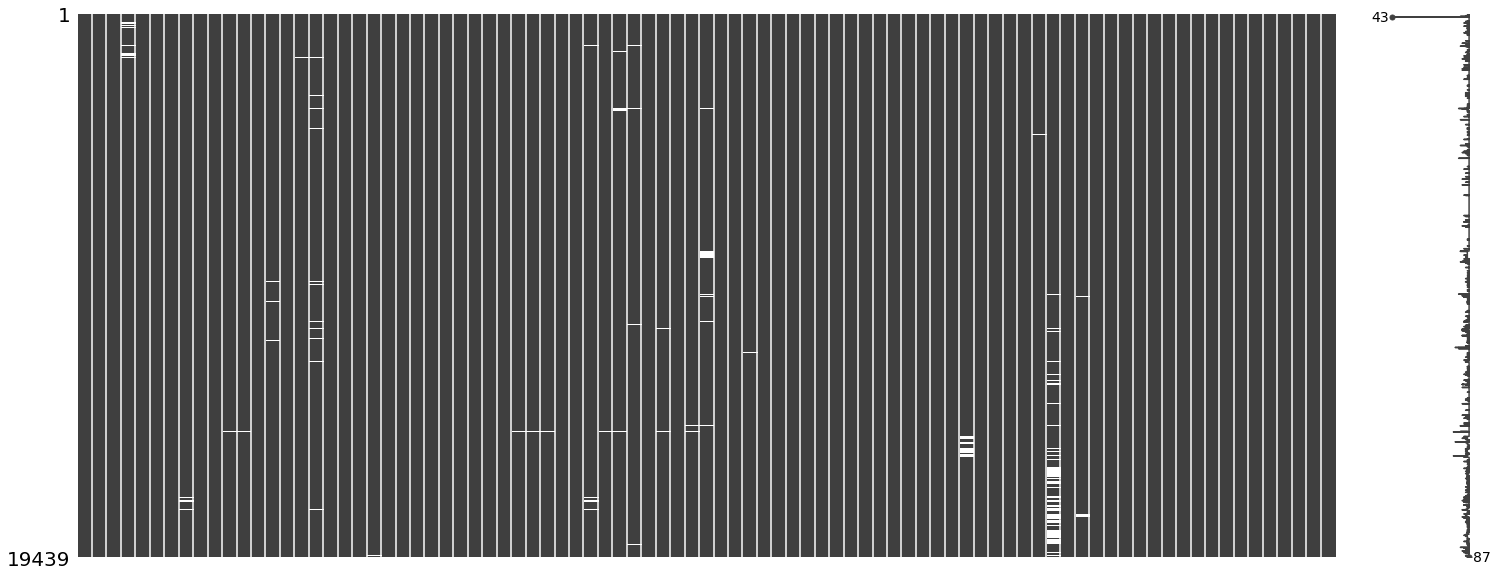

In [4]:
# пропуски в данных 
msn.matrix(full) # матрица, которая ещё и отражает места пропусков в датасете
def count_missing(df): # функция для подсчета пропусков в столбцах
    nan = df.isnull().sum().sort_values(ascending=False) 
    missing_val = nan[nan > 0]
    return missing_val

print(count_missing(full).head(10))
print(count_missing(test))
print(count_missing(train))

Попробуем посчитать пропущенные значения и оценить их количество. В полном датасете больше всего пропусков в столбце secondary_cleaner.output.tail_sol - 1748, затем 453 и 436 пропусков в столбцах rougher.input.floatbank11_xanthate и rougher.state.floatbank10_e_air соответственно, затем 370 и 220 для столбцов primary_cleaner.output.concentrate_sol и secondary_cleaner.state.floatbank2_a_air, 211 пропусков в столбце final.output.concentrate_sol, а дальше можно не считать, т.к. всё, что меньше 200 пропусков является менее, чем 1% датасета. 
В тестовой выборке пропусков меньше, в нем всего 5290 строк, больше всего просков в столбцах rougher.input.floatbank11_xanthate - 25 и в rougher.input.feed_sol - 21, это менее 0,5% датасета, поэтому поводом для беспокойства они не являются.
 

In [5]:
# обработка пропусков
full.fillna(method="ffill", inplace=True)
train.fillna(method="ffill", inplace=True)
test.fillna(method="ffill", inplace=True)
print(count_missing(full).head(10))
print(count_missing(test))
print(count_missing(train))

Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)


В задании была подсказка о том, что близкие по дате значения близки и по характеристикам, поэтому здесь уместен метод ffill функции fillna. 

In [6]:
# эффективность обогащения
C = train['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
F = train['rougher.input.feed_au'] # доля золота в сырье/концентрате до флотации/очистки
T = train['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки
rougher_output_recovery = (C * (F - T)) / (F * (C - T)) * 100
#display(rougher_output_recovery)
#display(train['rougher.output.recovery'])
mae = mean_absolute_error(rougher_output_recovery, train['rougher.output.recovery'])
print(mae)


9.73512347450521e-15


Вывод: 9.73512347450521e-15 это очень маленькое число, вероятно оно получилось из-за особенностей существования дробных чисел в Python. По сути же вычисления верны.

In [7]:
# признаки, недоступные в тестовой выборке
train_set = set(train.columns) #множество признаков в тренировочной выборке
test_set = set(test.columns)#множество признаков в тестовой выборке
train_only = train_set.difference(test_set) 
train_only

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке не хватает выходных концентраций металлов в продуктах после каждого этапа очистки, отвальных хвостов и расчетных характеристик расхода сульфида натрия. Эти значения получаются только в ходе обработки руды, поэтому их нельзя выяснить до запуска процесса. Они будут удалены перед обучением модели, но не сейчас, сейчас они ещё понадобятся для анализа данных.

## Анализ данных

#### 2.1 Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

aurum
1 8.266097326589103
2 19.772000139486316
3 32.1194004078765
4 44.0765129419528


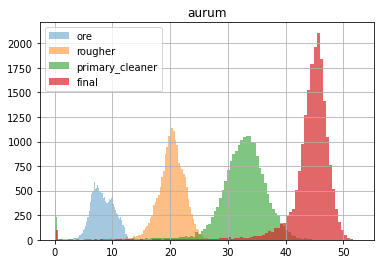

argentum
1 8.794927425814688
2 11.994759359873429
3 8.44240807771906
4 5.168386967510243


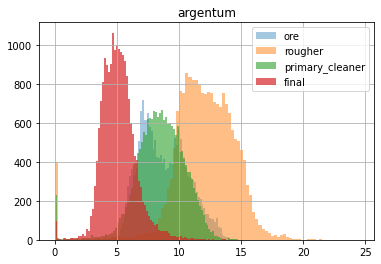

plumbum
1 3.585095711585748
2 7.606272313195003
3 9.810316539310149
4 9.978821384192907


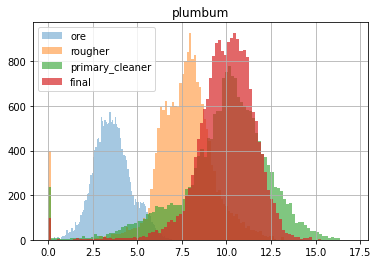

In [8]:
aurum = full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
argentum = full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
plumbum = full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',  'final.output.concentrate_pb']]
metals = [aurum, argentum, plumbum]
metal_name = ['aurum', 'argentum', 'plumbum']
metal_counter = 0
stages = ['ore', 'rougher', 'primary_cleaner', 'final']
for metal in metals:
    counter = 1
    print(metal_name[metal_counter])
    color = 0.4
    for col in metal.columns:
        print(counter, metal[col].mean())
        metal[col].hist(bins=100, alpha=color, label = stages[counter-1])
        counter +=1
        color += 0.1
    plt.legend()
    plt.title(metal_name[metal_counter])
    plt.show()
    metal_counter +=1


Концентрация золота на разных этапах отражена в столбцах 'rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', аналогично называются столбцы с другими металлами. Получилось запустить процесс подсчета концентраций металлов в каждой из проб и построение графиков в цикле. Судя по всему, серебро и свинец являются побочными проуктами в производстве золота, т.к. концентрация серебра падает в пробах по мере очистки золота, концентрация свинца нарастает после флотации и первичной очистки, но после вторичной почти не меняется. Возможно это связано с высокой плотностью этого металла или его высокой молекулярной массой.
Кроме того, обращают на себя внимание пики в области нуля, их анализ планируется далее.

#### 2.2 Распределение размеров гранул сырья на обучающей и тестовой выборках

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64
count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64


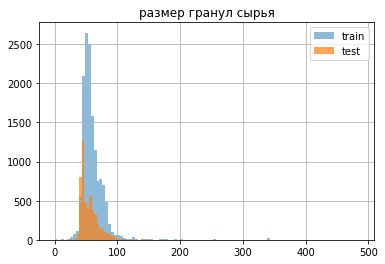

In [9]:
print(train['rougher.input.feed_size'].describe())
print(test['rougher.input.feed_size'].describe())
train['rougher.input.feed_size'].hist(bins=100, alpha=0.5, label = 'train')
test['rougher.input.feed_size'].hist(bins=100, alpha=0.7, label = 'test')
plt.legend()
plt.title('размер гранул сырья')
plt.show()

По форме графиков обучающая и тестовая выборка почти не отличаются, среднее в обучающей выборке больше, но больше и разброс. Форма гистограммы схожая, поэтому можно сдлать вывод об однаковом распределении, графики одинаково скошены вправо.

#### 2.3. Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

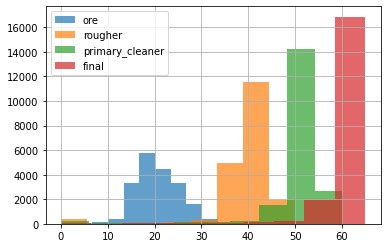

In [10]:
sum_metals = pd.DataFrame()
sum_metals['date'] = full['date']
sum_metals['ore'] = aurum['rougher.input.feed_au'] + argentum['rougher.input.feed_ag'] + plumbum['rougher.input.feed_pb']
sum_metals['rougher'] = aurum['rougher.output.concentrate_au'] + argentum['rougher.output.concentrate_ag'] + plumbum['rougher.output.concentrate_pb']
sum_metals['primary_cleaner'] = aurum['primary_cleaner.output.concentrate_au'] + argentum['primary_cleaner.output.concentrate_ag'] + plumbum['primary_cleaner.output.concentrate_pb']
sum_metals['final'] = aurum['final.output.concentrate_au'] + argentum['final.output.concentrate_ag'] + plumbum['final.output.concentrate_pb']
for_plots = sum_metals.drop('date', axis=1)
stages_for_plots = for_plots.columns
for stage in stages_for_plots:
    for_plots[stage].hist(alpha=0.7, label = stage)
plt.legend()
plt.show()
 
    


Как было видно на графиках из п.2.1 и текущем графике, в данных есть выбросы с нулевыми значениями. От них разумно избавиться, тем более их не так много.

In [11]:
print(train.shape)
train = train.loc[train['final.output.concentrate_au'] != 0]
print(train.shape)
train.loc[train['final.output.concentrate_pb'] == 0]
train.loc[train['final.output.concentrate_ag'] == 0]

(14149, 87)
(14091, 87)


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


Все строки с нулевыми концентрациями металлов удалены.

In [12]:
# выделим целевые признаки
# это rougher.output.recovery и final.output.recovery 
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = train[['rougher.output.recovery', 'final.output.recovery']] 
target_train_1 = train['rougher.output.recovery']
target_train_2 = train['final.output.recovery']
features_test = test
target_to_add = full[['date', 'rougher.output.recovery', 'final.output.recovery']]
test_plus_target = test.merge(target_to_add, on='date')
target_test = test_plus_target[['rougher.output.recovery', 'final.output.recovery']]
target_test1 = target_test['rougher.output.recovery']
target_test2 = target_test['final.output.recovery']

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно лучше привязаться ко времени. 

В данной задаче целевых признаков два, нужно научить модель предсказывать оба. Для подбора гиперпараметров модели можно разделить целевые признаки на два и тренировать модель на каждый из них.

In [13]:
# удаление лишних столбцов из обучающей выборки
train_only = list(train_only)
features_train = train.drop(columns=train_only, axis=1) # удаление столбцов, которых нет в тестовой выборке
#удаление столбца с датой
features_train = features_train.drop('date', axis=1)
features_test = features_test.drop('date', axis=1)

## Модель

#### 3.1. Функция для вычисления итоговой sMAPE.

In [14]:
#итоговое smape = 25% * smape(rougher) + 75% * smape(final)
def smape(predictions, target):
    smapes = abs(target - predictions)/((abs(target) + abs(predictions))/ 2)
    smape = np.mean(smapes)
    return(smape)
def final_smape(rougher_smape, output_smape):
    return rougher_smape * 0.25 + output_smape * 0.75
SMAPE = make_scorer(smape, greater_is_better=True)

In [15]:
# проверим, работает ли функция
# поробуем предсказать rougher.output.recovery
model = LinearRegression() # инициализация модели логистической регрессии
model.fit(features_train, target_train_1) # обучение модели на тренировочной выборке
predictions = pd.Series(model.predict(features_train)) # предсказания модели на валидационной выборке
rougher_smape = smape(predictions, target_train_1)

# поробуем предсказать final.output.recovery
model = LinearRegression() # инициализация модели логистической регрессии
model.fit(features_train, target_train_2) # обучение модели на тренировочной выборке
predictions = pd.Series(model.predict(features_train)) # предсказания модели на валидационной выборке
output_smape = smape(predictions, target_train_2)

print(final_smape(rougher_smape, output_smape))

0.09710340558000893


Похоже что всё работает. Можно приступать к выполению задания

#### 3.2. Построение модели

In [16]:
#DecisionTreeRegressor
#rougher.output.recovery
model = DecisionTreeRegressor(random_state=12345)
scores = cross_val_score(model, features_train, target_train_1, scoring=SMAPE, cv=5)
rougher_score = sum(scores)/ 5
print("sMAPE для оценки rougher.output.recovery:", rougher_score)
#final.output.recovery
model = DecisionTreeRegressor(random_state=12345)
scores = cross_val_score(model, features_train, target_train_2, scoring=SMAPE, cv=5)
output_score = sum(scores)/ 5
print("sMAPE для оценки final.output.recovery:", output_score)
print('sMAPE:', final_smape(rougher_score, output_score))

sMAPE для оценки rougher.output.recovery: 0.20885109952194245
sMAPE для оценки final.output.recovery: 0.1604762100459664
sMAPE: 0.1725699324149604


In [17]:
#LinearRegression
# rougher.output.recovery
model_lr_1 = LinearRegression()
model_lr_1.fit(features_train, target_train_1)
scores = cross_val_score(model_lr_1, features_train, target_train_1, scoring=SMAPE, cv=5)
rougher_score = sum(scores)/ 5
print("sMAPE для оценки rougher.output.recovery:", rougher_score)
# поробуем предсказать final.output.recovery
model_lr_2 = LinearRegression() # инициализация модели логистической регрессии
model_lr_2.fit(features_train, target_train_2)
scores = cross_val_score(model_lr_2, features_train, target_train_2, scoring=SMAPE, cv=5)
output_score = sum(scores)/ 5
print("sMAPE для оценки final.output.recovery:", output_score)
print('sMAPE:', final_smape(rougher_score, output_score))

sMAPE для оценки rougher.output.recovery: 0.1276095096676852
sMAPE для оценки final.output.recovery: 0.10976969248287563
sMAPE: 0.11422964677907803


Подбор гиперпараметров случайного леса посредством кросс-валидации это мучительно долго, однако этого требуют условия задачи, придется потратить время. Часть вариантов пребора намеренно опущена.

In [26]:
#RandomForestRegressor
#rougher.output.recovery
#подбор гиперпараметров
#max_depth
model_1 = None
best_depth = 0
best_result = 1
for depth in range(5, 8, 1):
    model = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=12345)
    scores = cross_val_score(model, features_train, target_train_1, scoring=SMAPE, cv=5)
    rougher_score = sum(scores)/ 5
    if rougher_score < best_result:
        model_1 = model
        best_result = rougher_score
        best_depth_1 = depth
print('best_result = ', best_result, 'depth = ', best_depth_1)

best_result =  0.10671734244288585 depth =  6


In [31]:
#RandomForestRegressor
#rougher.output.recovery
#подбор гиперпараметров
#n_estimators
model_1 = None
best_est = 0
best_result = 1
for est in range(15, 18, 1):
    model = RandomForestRegressor(n_estimators=est, max_depth=best_depth_1, random_state=12345)
    scores = cross_val_score(model, features_train, target_train_1, scoring=SMAPE, cv=5)
    rougher_score = sum(scores)/ 5
    if rougher_score < best_result:
        model_1 = model
        best_result = rougher_score
        best_est_1 = est
print('best_result = ', best_result, 'est = ', best_est_1)

best_result =  0.10639035447521752 est =  17


In [33]:
#RandomForestRegressor
#final.output.recovery
#подбор гиперпараметров
#max_depth
model_2 = None
best_depth = 0
best_result = 1
for depth in range(5, 8, 1):
    model = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=12345)
    scores = cross_val_score(model, features_train, target_train_2, scoring=SMAPE, cv=5)
    output_score = sum(scores)/ 5
    if output_score < best_result:
        model_2 = model
        best_result = output_score
        best_depth_2 = depth
print('best_result = ', best_result, 'depth = ', best_depth_2)

best_result =  0.0914585637160647 depth =  5


In [36]:
#RandomForestRegressor
#final.output.recovery
#подбор гиперпараметров
#n_estimators
model_2 = None
best_est = 0
best_result = 1
for est in range(19, 22, 1):
    model = RandomForestRegressor(n_estimators=est, max_depth=best_depth_2, random_state=12345)
    scores = cross_val_score(model, features_train, target_train_2, scoring=SMAPE, cv=5)
    output_score = sum(scores)/ 5
    if output_score < best_result:
        model_2 = model
        best_result = output_score
        best_est_2 = est
print('best_result = ', best_result, 'est = ', best_est_2)

best_result =  0.0914585637160647 est =  20


In [41]:
#обучение моделей
# rougher.output.recovery
model_1 = RandomForestRegressor(n_estimators=best_est_1, max_depth=best_depth_1, random_state=12345)
model_1.fit(features_train, target_train_1)
# final.output.recovery
model_2 = RandomForestRegressor(n_estimators=best_est_2, max_depth=best_depth_2, random_state=12345) 
model_2.fit(features_train, target_train_2)
print('sMAPE:', final_smape(rougher_score, output_score))

sMAPE: 0.09533775734987446


Согласно данным кросс-валидации, лучшей моделью для предсказания rougher.output.recovery оказался случайный лес с параметрами глубина = 6, количество деревьев = 17, sMAPE получился 0.106. Лучшая модель для предсказания final.output.recovery это случайный лес с гиперпараметрами глубина = 5, количество деревьев = 20, для него sMAPE = 0.091. Осталось проверить на тестовой выборке, не упадет ли ощутимо качество моделей.

In [42]:
# rougher.output.recovery
#RandomForest
predictions = pd.Series(model_1.predict(features_test)) 
result = smape(predictions, target_test1)
print('RandomForest score = ', result)
#linearRegression
predictions = pd.Series(model_lr_1.predict(features_test)) 
result = smape(predictions, target_test1)
print('LinearRegression score = ', result)

RandomForest score =  0.10692054158374428
LinearRegression score =  0.09788094090197053


In [44]:
# final.output.recovery
#RandomForest
predictions = pd.Series(model_2.predict(features_test)) 
result = smape(predictions, target_test2)
print('RandomForest score = ', result)
#linearRegression
predictions = pd.Series(model_lr_2.predict(features_test)) 
result = smape(predictions, target_test2)
print('LinearRegression score = ', result)

RandomForest score =  0.098638647462053
LinearRegression score =  0.09929313518335633


In [45]:
print('sMAPE:', final_smape(0.09788094090197053, 0.098638647462053))

sMAPE: 0.09844922082203239


Судя по тестовой выборке, для предсказания rougher.output.recovery более эффективной оказалась модель линейной регресии, а для final.output.recovery случайный лес.

In [54]:
#проверка модели на вменяемость - сравнение с константной моделью
# rougher.output.recovery
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train_1)
predictions = pd.Series(dummy_regr.predict(features_test)) 
result1 = smape(predictions, target_test1)
print(result1)

0.10359118895499324


In [51]:
# final.output.recovery
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train_2)
predictions = pd.Series(dummy_regr.predict(features_test)) 
result2 = smape(predictions, target_test2)
print(result2)

0.10095986964588229


In [52]:
print('sMAPE:', final_smape(result1, result2))

sMAPE: 0.10161769947316003


### Вывод

Построены модели для предсказания двух целевых признаков: rougher.output.recovery и final.output.recovery. Качество моделей оценивалось с помощью метрики sMAPE (симметричный средний процент отклонения), ориентируясь на эту метрику лучшей моделью для предсказания rougher.output.recovery оказалась линейная регресия, а лучшей моделью для предсказания final.output.recovery стал случайный лес с гиперпараметрами глубина = 5, количество деревьев = 20. Кросс-валидация для подбора гиперпараметров оказалась очень медленным инструментом, однако позволила заметно уменьшить фактор переобучения случайного леса. Итоговый sMAPE получился 0.098, что превышает показатель случайной модели 0.102, хотя и ненамного.